# ADVI scratchpad

Let's start with a simple model:

$$
\begin{align}
n &\sim \mathrm{Normal}(\mu, \sigma^2) \\
\mu &\sim \mathrm{Gamma}(2, 1) \\
\sigma &\sim \mathrm{Gamma}(1, 2)
\end{align}
$$

## Generate fake data

In [1]:
using Distributions
using ForwardDiff
using VinDsl
srand(12587);

In [2]:
N = 5000
a, b, c, d = 2, 1, 1, 2
λ = Gamma(a, b)
ϕ = Gamma(d, c)
μ = rand(λ)
σ = rand(ϕ)
n = rand(Normal(μ, σ), N);

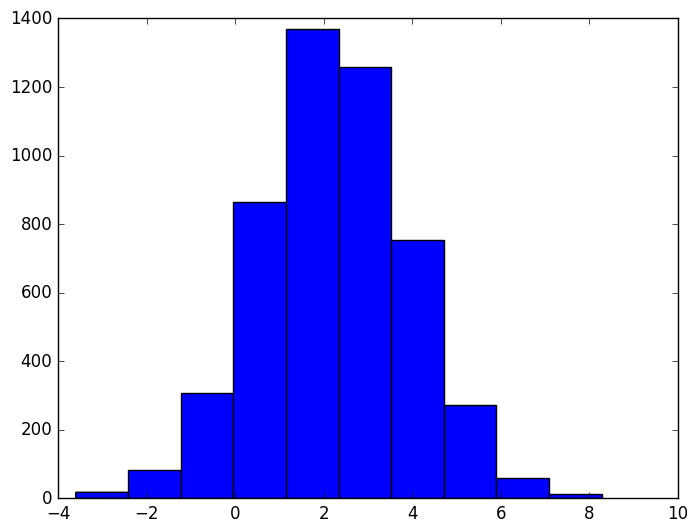

In [3]:
using PyPlot
plt[:hist](n);

## Build the ELBO

In [4]:
constrain_positive(x) = exp(x)
unconstrain_positive(x) = log(x)
post_pars(d::Distribution) = (p = length(d); Int(p * (p + 3)/2))

post_pars (generic function with 1 method)

In [5]:
vars = [λ, ϕ]
nvars = length(vars)
npars = sum(map(post_pars, vars))

4

In [6]:
x = rand(npars)

4-element Array{Float64,1}:
 0.95917 
 0.595884
 0.173404
 0.262329

In [7]:
function ELBO(x)  
    # make posterior distributions
    d_λ = Normal(x[1], exp(x[2]))
    d_ϕ = Normal(x[3], exp(x[4]))
    
    # scaled unconstrained parameters
    ζ_λ = rand(d_λ)
    ζ_ϕ = rand(d_ϕ)
    
    # constrained parameters
    λ = constrain_positive(ζ_λ)
    ϕ = constrain_positive(ζ_ϕ)
    
    # jacobian
    jac = ForwardDiff.jacobian(constrain_positive)
    
    # make ELBO
    L = sum(map(H, [d_λ, d_ϕ]))
    L += logpdf(Gamma(a, b), λ)
    L += logpdf(Gamma(d, c), ϕ)
    L += sum(logpdf(Normal(λ, ϕ), n))
    L += logdet(jac([ζ_λ]))
    L += logdet(jac([ζ_ϕ]))
end

ELBO (generic function with 1 method)

In [8]:
ELBO(x)

-2.348429282943737e7

In [9]:
x0 = randn(npars)

4-element Array{Float64,1}:
  1.10703 
  0.984969
 -1.23284 
 -2.0394  

In [10]:
∇L = ForwardDiff.gradient(ELBO)

g (generic function with 1 method)

In [11]:
ELBO(x)

-23462.09802678982

In [12]:
eps = 0.1
decay = 0.9
x = x0
avg_sq_grad = nothing
elbo = Float64[]

0-element Array{Float64,1}

In [13]:
for idx in 1:200
    gg = ∇L(x)
    if avg_sq_grad != nothing
        avg_sq_grad = avg_sq_grad * decay + gg.^2 * (1 - decay)
    else
        avg_sq_grad = gg.^2
    end
    x += eps * gg ./ (sqrt(avg_sq_grad) + 1e-8) 
    L = ELBO(x)
    display(L)
    push!(elbo, L)
end

-259467.14851884887

-104712.94635494947

-58632.48848806808

-159340.65142167587

-420202.95073496655

-31348.73669751738

-4.304555593385892e6

-28491.087877935403

-39175.57786083637

-26096.25757050557

-37020.81825680765

-332876.1910224278

-23606.395617488466

-22848.06187115289

-18518.963890748622

-16974.00105141263

-19781.800140425355

-13000.087753695332

-12107.753659825376

-18784.99404432926

-19414.02264483325

-13925.4992851195

-18737.864508068877

-19775.03959703437

-18849.351632978203

-19134.687041518202

-12513.856063299072

-11984.320442045335

-11570.403539979565

-13092.41832623739

-16610.616157791475

-11123.232085549944

-18012.240556460823

-13252.956674209849

-20444.245052400725

-22341.53133167563

-13319.840919264772

-16201.324590325858

-14257.674155706272

-12273.649502478409

-19944.23946710261

-18465.045530201274

-18570.730502720668

-14167.195791895738

-14365.59918942045

-16187.705759739858

-12667.58909800838

-14843.245311422324

-13551.482048605963

-10557.216460332682

-13548.431925763945

-12840.762389416408

-14817.71133840832

-16366.324505012453

-16031.789219215365

-15516.824464014317

-10270.424838048779

-14448.72397126706

-12242.671279859649

-10338.89131437726

-12978.165906238704

-15491.466045994572

-13463.316432325837

-14963.684763113219

-13542.96337338789

-48376.03934415692

-12332.214422308609

-10638.274685682933

-9803.53341780212

-10056.548360402578

-9715.129655267172

-9648.535948301229

-13818.337245615503

-9677.259915671413

-11440.192321683398

-11375.772494810904

-10427.80579994973

-9908.894949842188

-11852.696449707342

-9685.520917295396

-10759.530101184544

-9783.680787616484

-10327.801516656249

-10507.145328818691

-12040.167904104675

-10262.487247519808

-18199.416638427305

-9824.990544369077

-10300.108374554811

-9909.172568595237

-11491.75722943876

-9801.024514162626

-11232.428354680824

-10625.233890931762

-10700.717732733776

-10256.127798261878

-10177.690342480515

-10537.885752227476

-11102.98732081736

-10260.769550797579

-10027.732487651301

-11652.05519940559

-11520.486293355341

-11222.528068128355

-10121.815554343415

-9831.366877959557

-9807.428074428743

-9915.538102030572

-11055.00937927732

-10187.13920693125

-11828.190534301564

-10770.462699255166

-10531.812346334456

-11355.253074972652

-10247.545020150112

-11597.5587382508

-11677.45496257474

-10764.618244626696

-10348.620144715802

-10816.124369503876

-10470.797308249292

-10843.025551586174

-10908.697401603322

-9750.859058770438

-12938.766879920473

-10602.52918418354

-10202.370816024892

-11392.281100439606

-10423.27878044632

-10012.848474515169

-10579.072487982343

-10295.856031863084

-10109.433697155253

-10177.609060687608

-9837.671851653486

-10358.362120827112

-10411.694607637439

-9787.785095717343

-9789.240575700189

-9748.246264014368

-9801.036050582701

-11217.87967433564

-10673.946563709378

-9736.064507732342

-10106.633797698178

-9998.343683160407

-10451.718273910816

-9814.730707583327

-10528.558737123183

-9722.920067731542

-10180.296733921401

-10071.553083960398

-10503.954111018838

-10177.17334946473

-9884.890216791971

-10711.45517467584

-9833.325014449072

-9647.056200073459

-9925.803474421678

-9647.13721232162

-9751.089227367764

-9672.459501385145

-10405.514941758956

-9662.300532282734

-9871.08588170735

-10101.380612941179

-10042.639768503726

-10059.61764642266

-9931.702899266655

-9923.90927523879

-9745.06903699962

-9720.788412862325

-9638.286007720257

-9637.501542837952

-9650.54894897395

-9760.475667767394

-9724.987056514514

-9667.08135791788

-9638.214485953484

-9722.714278283926

-9646.115156826132

-9648.168322880521

-9801.413808199042

-9671.588133164661

-9765.691467592029

-9742.630981305552

-9701.182225604383

-9651.842621030737

-9766.06428161239

-9674.414143634805

-9645.52648416861

-9648.217096505019

-9637.216886250519

-9646.339392922038

-9637.207242140781

-9660.878234175232

-9665.843342879914

-9645.243106775712

-9656.164908157283

-9647.296355439577

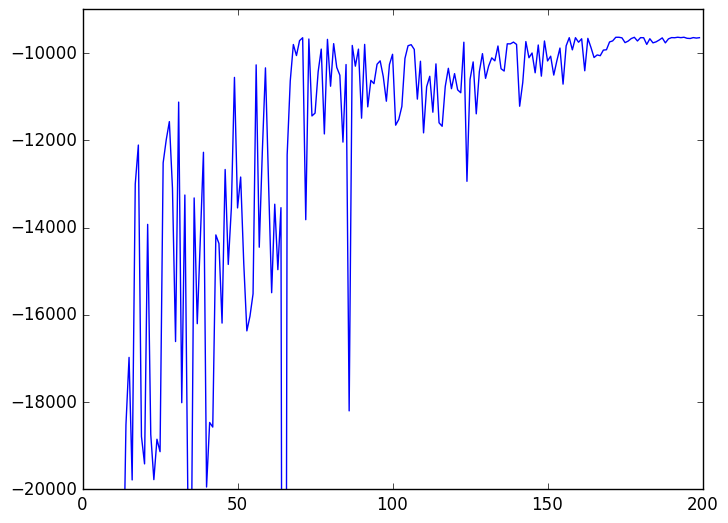

(-20000.0,-9000)

In [14]:
plot(elbo)
plt[:ylim](-2e4, -9000)

In [15]:
∇L(x)

4-element Array{Float64,1}:
 1484.72   
 -293.359  
   65.4173 
    1.17444

In [16]:
x

4-element Array{Float64,1}:
  0.746792
 -2.26861 
  0.54344 
 -4.51826 

In [17]:
exp(x[1]), exp(x[3])

(2.110219537960809,1.721920267633047)

In [18]:
μ, σ

(2.215222085416203,1.6399410610591019)